<a href="https://colab.research.google.com/github/serdarbozoglan/01_Computer_Vision/blob/master/OpenCV_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams


%matplotlib inline
sns.set_style('white')

rcParams['figure.figsize'] = 8, 6

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import time
import os


%matplotlib inline
%config InlineBackend.figure_format='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Turn off scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

RANDOM_SEED =4299
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED)

In [0]:
!gdown --id 16jP0_ESP0PXnrbygsWMeqlIU-jAP6dJ6

Downloading...
From: https://drive.google.com/uc?id=16jP0_ESP0PXnrbygsWMeqlIU-jAP6dJ6
To: /content/snail.jpg
100% 212k/212k [00:00<00:00, 80.2MB/s]


In [0]:
img = cv2.imread(filename='snail.jpg', flags = cv2.IMREAD_COLOR)

In [0]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [0]:
height, width, channels = img.shape
height, width, channels

(1710, 1600, 3)

### Color Channels

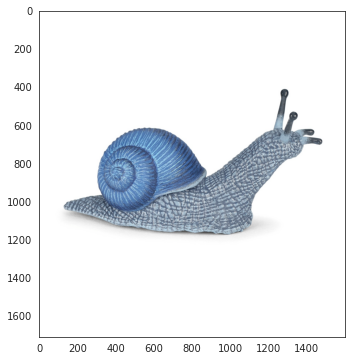

In [0]:
# Showing with matplotlib
# Colro channels are not good for now
plt.imshow(img)

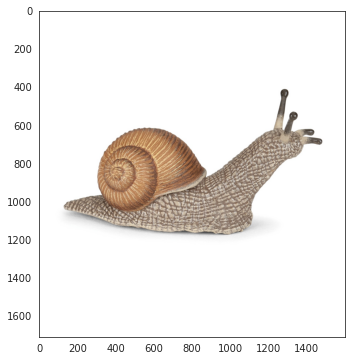

In [0]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

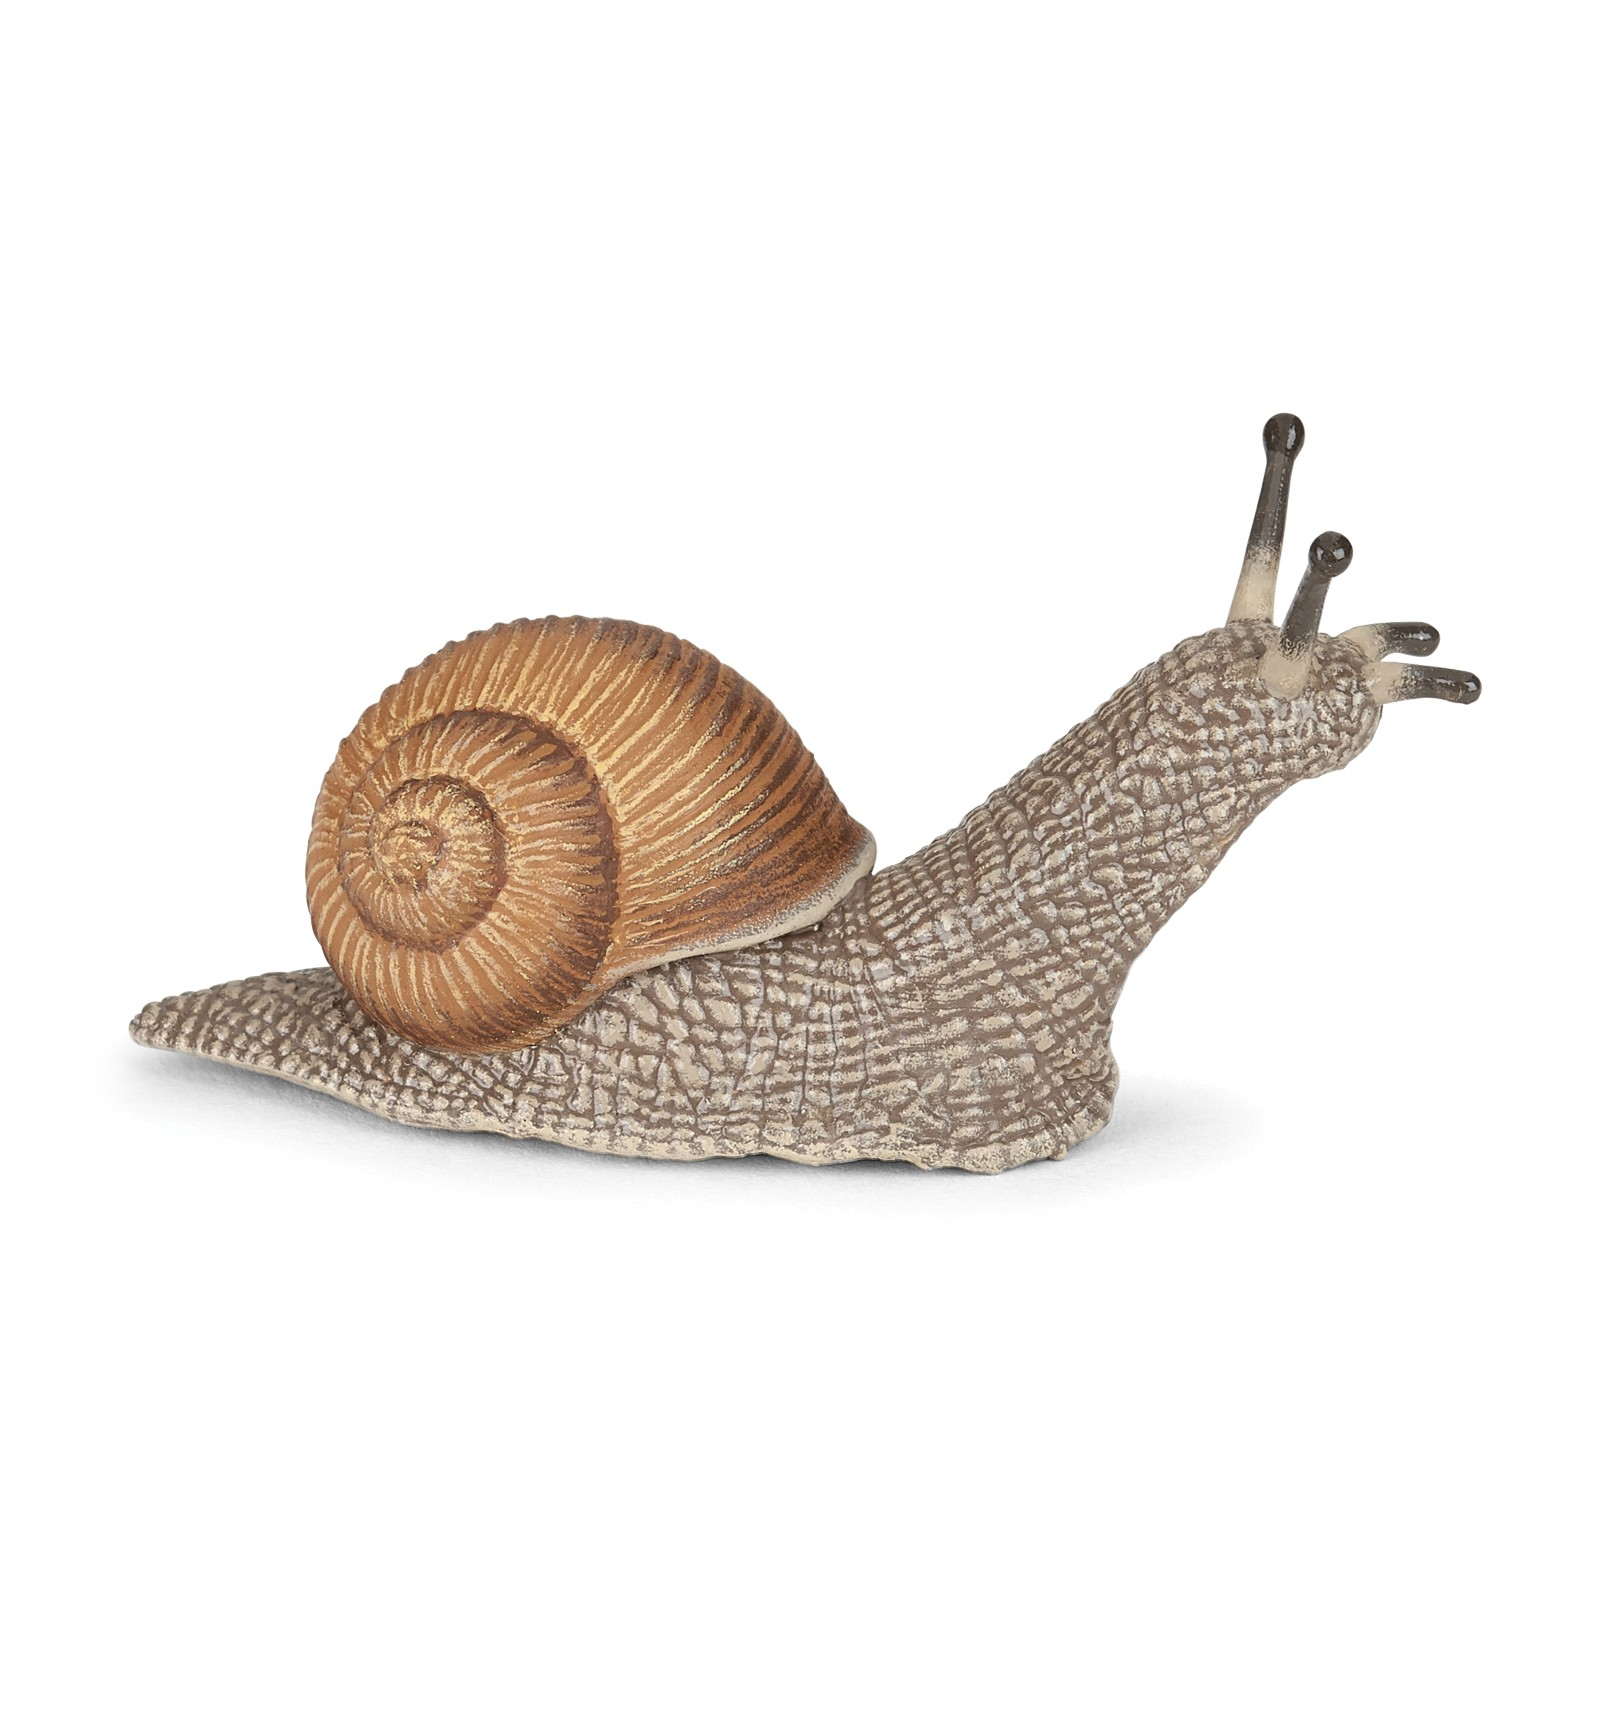

In [0]:
# This does not require color channel transformation 
img2 = cv2.imread('snail.jpg')
# cv2_imshow is needen in colab
# original code is cv.imshow()
cv2_imshow(img2)

(1710, 1600)


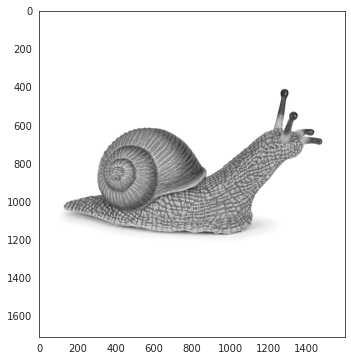

In [0]:
img = cv2.imread('snail.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray');

### Saving an Image

In [0]:

cv2.imwrite('snail-gray.jpg', gray)

True

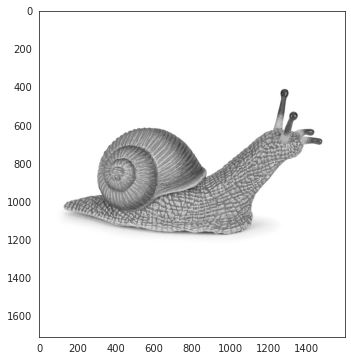

In [0]:
gray2 = cv2.imread('snail-gray.jpg')
plt.imshow(gray2);

In [0]:
def show_image(image, show_axis=True):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not show_axis:
        plt.axis('off')

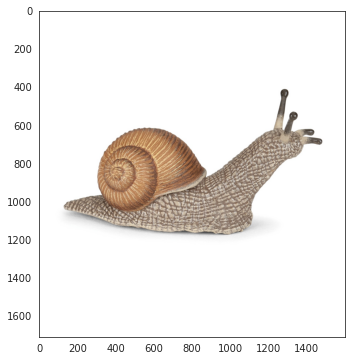

In [0]:
show_image(img)

### Resizing

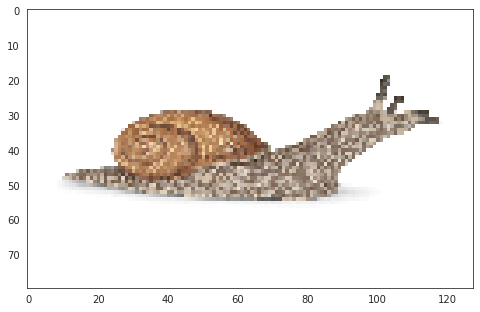

In [0]:
img = cv2.imread('snail.jpg')
w, h = 128, 80
resized = cv2.resize(img, (w, h), cv2.INTER_LANCZOS4)
show_image(resized)

### Cropping

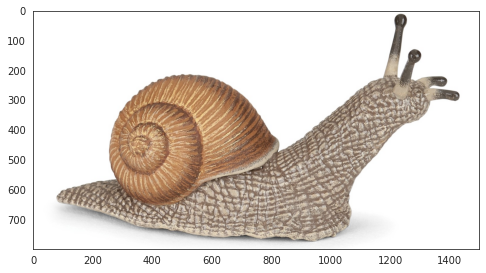

In [0]:
# Values are found by trail an error
cropped = img[400:1200, 50:1550]
show_image(cropped)

### Rotation

In [0]:
# Code by Adrian Rosebrock 
# https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/

def rotate_bound(image, angle):
    
    # grab the dimensions of the image and then determine
    (h, w) = image.shape[:2]
    
    # we're finding the center of the image below
    (cX, cY) = (w // 2, h // 2)

    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

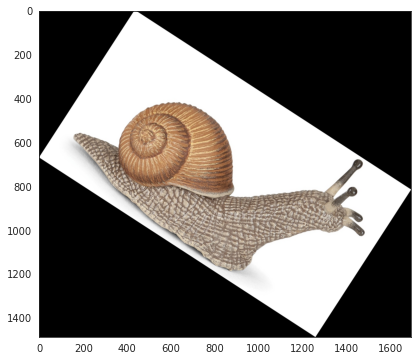

In [0]:
show_image(rotate_bound(cropped, 33))

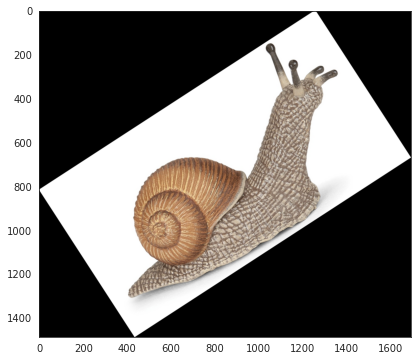

In [0]:
show_image(rotate_bound(cropped, -33))

### Blur an Image

In [0]:
!gdown --id 1vpUJWPcjhJ6qY9ebZ3uQGlP0OYSocXJg

Downloading...
From: https://drive.google.com/uc?id=1vpUJWPcjhJ6qY9ebZ3uQGlP0OYSocXJg
To: /content/gym.jpg
2.12MB [00:00, 66.6MB/s]


In [0]:
background = cv2.imread('gym.jpg', cv2.IMREAD_COLOR)

h, w = background.shape[:2]
h, w

(2988, 5312)

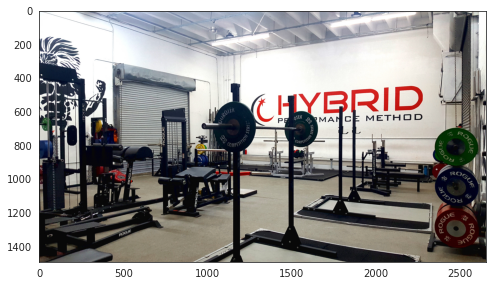

In [0]:
background = cv2.resize(background, (w //2, h//2))
show_image(background)

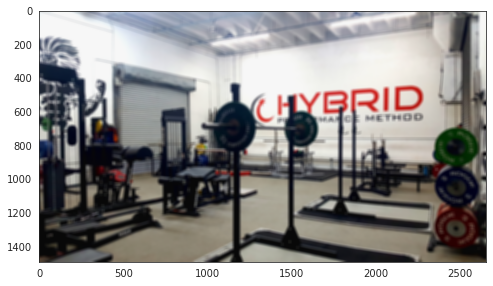

In [0]:
kernel_len = 21
blurred = cv2.GaussianBlur(background, 
                 (kernel_len, kernel_len),
                 sigmaX =120,
                 sigmaY = 45)
show_image(blurred)

### Finding Contours

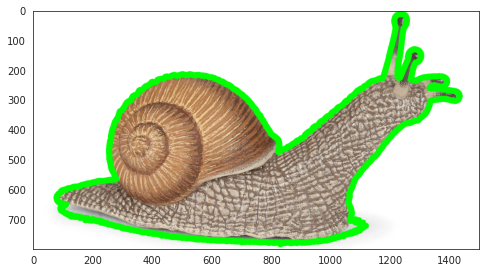

In [0]:
# Image should be in Gray Format
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(
  src = gray,
  thresh = 225,
  maxval = 255, 
  type = cv2.THRESH_BINARY_INV
)

contours, _ = cv2.findContours(
  image = binary, 
  mode = cv2.RETR_EXTERNAL, 
  method = cv2.CHAIN_APPROX_SIMPLE
)

contour_img = cropped.copy()

show_image(
  cv2.drawContours(
    image = contour_img, 
    contours = contours, 
    contourIdx = -1, 
    color = (0, 255, 0), 
    thickness = 20
  )
)

## Placing One Image On Another

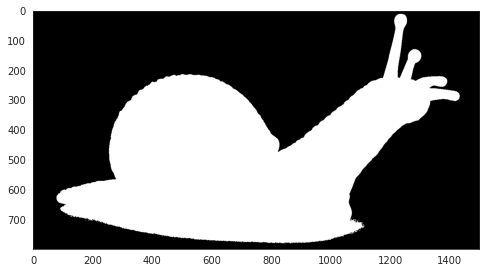

In [0]:
# it is ablack canvas now
mask = np.zeros_like(cropped)
mask = cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)
show_image(mask)

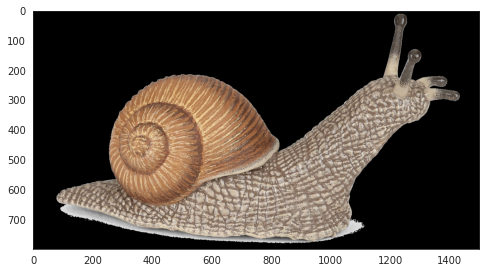

In [0]:
masked_snail = cv2.bitwise_and(src1=cropped, src2=cropped, 
                               mask=cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY))
show_image(masked_snail)

In [0]:
new_mask = np.zeros_like(blurred)

#We're defining where we will place the snail on the blurred gym background
new_mask[650:650 + masked_snail.shape[0],
         750:750 + masked_snail.shape[1]] = masked_snail

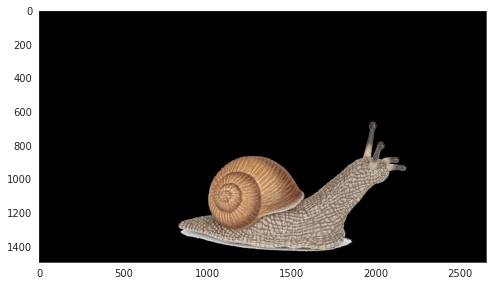

In [0]:
show_image(new_mask)

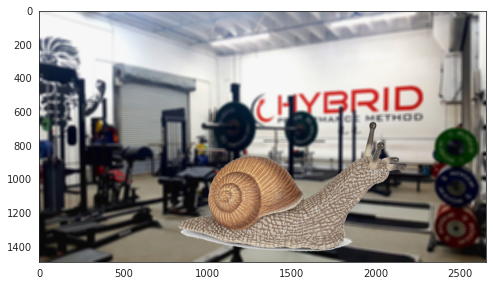

In [0]:
_, alpha = cv2.threshold(
  src = cv2.cvtColor(new_mask, cv2.COLOR_RGB2GRAY), 
  thresh = 0, 
  maxval = 255, 
  type = cv2.THRESH_BINARY
)
b, g, r = cv2.split(new_mask)
alpha_image = cv2.merge((b, g, r, alpha))
final_image = blurred.copy()
alpha_s = alpha_image[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
  final_image[:, :, c] = (alpha_s * alpha_image[:, :, c] +\
                          alpha_l * final_image[:, :, c])
show_image(final_image)

### Drawing Circles

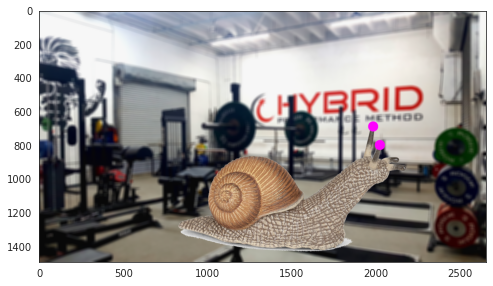

In [0]:
image = final_image.copy()

eye_coordinates = [(1985, 690), (2025, 800)]

for ec in eye_coordinates:
  image = cv2.circle(
    img = image, 
    center = ec, 
    radius = 30, 
    color = (255, 0, 255), 
    thickness = -1
  )

show_image(image)

### Drawing Text

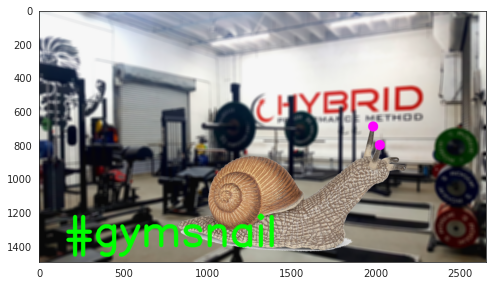

In [0]:
final_img = image.copy()

cv2.putText(
  img = final_img,
  text = '#gymsnail', 
  org = (150, final_img.shape[0] - 100), 
  fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
  fontScale = 8,
  color = (0, 255, 0),
  thickness = 23
)

show_image(final_img)